In [27]:
import pandas as pd
import numpy as np

data = pd.read_csv('Multi_27.txt', skiprows = 29,sep='\t')
 
data.columns = ['Timestamp', 'Channel A', 'Channel B', 'Unnamed']
data_1 = data.drop('Channel B', axis=1)
data_2 = data_1.drop('Unnamed', axis=1)
data_2['Channel A'] = pd.to_numeric(data_2["Channel A"], errors='coerce')
data_3 = data_2.dropna()
import sys
np.set_printoptions(threshold=sys.maxsize)
data_3.to_numpy()

e1 = (data_3.to_numpy()[:, 0] < 70)
arr = data_3.to_numpy()[e1]
print(data_3.to_numpy()[e1])
#print(data_3.to_numpy())
data_list = arr.tolist()
type(data_list)

[[0.0000e+00 1.3590e-02]
 [6.4000e-02 1.3610e-02]
 [1.2800e-01 1.3620e-02]
 [1.9200e-01 1.3630e-02]
 [2.5600e-01 1.3620e-02]
 [3.2000e-01 1.3580e-02]
 [3.8400e-01 1.3570e-02]
 [4.4800e-01 1.3640e-02]
 [5.1200e-01 1.3600e-02]
 [5.7600e-01 1.3600e-02]
 [6.4000e-01 1.3650e-02]
 [7.0400e-01 1.3630e-02]
 [7.6800e-01 1.3660e-02]
 [8.6400e-01 1.3690e-02]
 [9.2800e-01 1.3690e-02]
 [9.9200e-01 1.3650e-02]
 [1.0560e+00 1.3610e-02]
 [1.1200e+00 1.3640e-02]
 [1.1840e+00 1.3680e-02]
 [1.2480e+00 1.3560e-02]
 [1.3120e+00 1.3660e-02]
 [1.3760e+00 1.3620e-02]
 [1.4400e+00 1.3660e-02]
 [1.5040e+00 1.3690e-02]
 [1.5680e+00 1.3690e-02]
 [1.6640e+00 1.3670e-02]
 [1.7280e+00 1.3700e-02]
 [1.7930e+00 1.3700e-02]
 [1.8570e+00 1.3640e-02]
 [1.9210e+00 1.3660e-02]
 [1.9850e+00 1.3660e-02]
 [2.0490e+00 1.3680e-02]
 [2.1130e+00 1.3650e-02]
 [2.1770e+00 1.3650e-02]
 [2.2410e+00 1.3660e-02]
 [2.3050e+00 1.3680e-02]
 [2.3690e+00 1.3680e-02]
 [2.4650e+00 1.3690e-02]
 [2.5290e+00 1.3720e-02]
 [2.5930e+00 1.3740e-02]


list

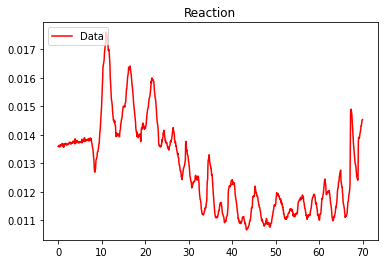

0.01759
The x-value with maximum y-value is : 1.1440000000000001


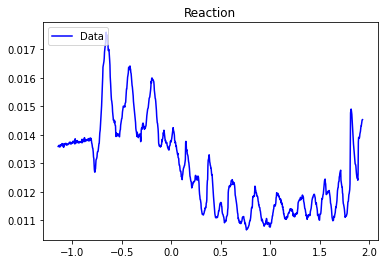

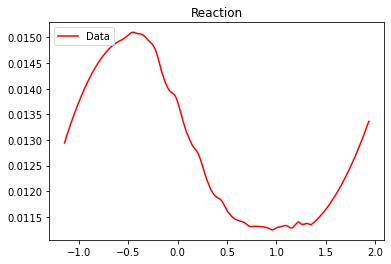

In [28]:
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter
xi = arr[:,0]
x = arr[:,0]
y = arr[:,1]
yfi = savgol_filter(y, 401, 2) # window size 51, polynomial order 3

plt.plot(xi,y,'-r') 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

a = max(y)
print(a)
# Python3 code to demonstrate 
# to get tuple info. of maximum value tuple
# using max() + itemgetter()
from operator import itemgetter
# using max() + itemgetter()
# to get tuple info. of maximum value tuple
toc = 25/1.1
res = 26
# printing result
print ("The x-value with maximum y-value is : " + str(res/toc))

plt.plot((x-res)/toc,y,'-b') 
#toc - time for moving translation stage by 1cm. 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

plt.plot(((x-res)/toc),yfi,'-r') 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Define the function
def Closed(x,c,e,d):
    return c*(1  + (4*e*x/((x**2 + 9)*(x**2 + 1))) - (d/(1 + x**2)))
popt, pcov = curve_fit(Closed, (x-res)/toc, yfi)

In [30]:
from pylab import *
fit_c = popt[0]
fit_e = popt[1]
fit_d = popt[2]
err_c = sqrt(pcov[0][0])
err_e = sqrt(pcov[1][1])
err_d = sqrt(pcov[2][2])

print("The best fit for c is: " + str(fit_c))
print("The best fit for d is: " + str(fit_d))
print("The best fit for e is: " + str(fit_e))
print("The error for c is: " + str(err_c))
print("The error for d is: " + str(err_d))
print("The error for e is: " + str(err_e))

The best fit for c is: 0.012639107665748358
The best fit for d is: -0.06464437633532034
The best fit for e is: -0.6024258746972726
The error for c is: 4.5403372798524925e-05
The error for d is: 0.005365653276259604
The error for e is: 0.00758601667415012


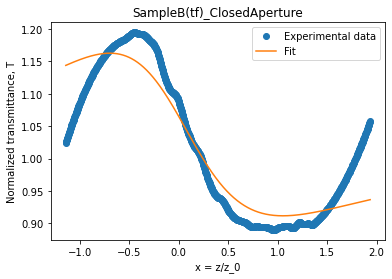

In [31]:
fit_y = Closed((x-res)/toc, fit_c, fit_e, fit_d)
plt.title('SampleB(tf)_ClosedAperture') 
plt.xlabel('x = z/z_0')
plt.ylabel('Normalized transmittance, T')
plt.plot((x-res)/toc, yfi/fit_c, 'o', label='Experimental data')
plt.plot((x-res)/toc, fit_y/fit_c, '-', label='Fit')
plt.legend()